## Data Cleaning

In [1]:
#import pandas and NumPy package
import pandas as pd
import numpy as np

### 01. Extract Data into a DataFrame

In [7]:
#extract data in csv format
df_titanic = pd.read_csv('../data/raw/Titanic dataset.csv')

In [8]:
#check df_titanic
df_titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [9]:
# create a working copy of df_titanic dataframe
df_titanic_copy = df_titanic.copy()
df_titanic_copy.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 2. Check Duplicates


In [10]:
#remove duplicate values
df_titanic_copy.drop_duplicates(inplace=True)

### 3. Remove unused columns

In [11]:
# remove columns 
df_titanic_copy.drop(columns=['name', 'home.dest', 'cabin', 'ticket', "sibsp", "parch", "boat", "body"], inplace=True, errors='ignore')
df_titanic_copy.head(10)

,pclass,survived,sex,age,fare,embarked
0,1,1,female,29.00,211.3375,S
1,1,1,male,0.92,151.5500,S
2,1,0,female,2.00,151.5500,S
3,1,0,male,30.00,151.5500,S
4,1,0,female,25.00,151.5500,S
5,1,1,male,48.00,26.5500,S
6,1,1,female,63.00,77.9583,S
7,1,0,male,39.00,0.0000,S
8,1,1,female,53.00,51.4792,S
9,1,0,male,71.00,49.5042,C


### 4. Sandardize numbers

In [12]:
# round 'fare' numbers to 2 decimal places
df_titanic_copy['fare'] = df_titanic_copy['fare'].round(2)
df_titanic_copy.head(2)

,pclass,survived,sex,age,fare,embarked
0,1,1,female,29.00,211.34,S
1,1,1,male,0.92,151.55,S


### 5. Encoding Categorical values

In [13]:
# convert male and female category to 0, and 1 -> 'male':0, 'female':1
df_titanic_copy['sex'] = df_titanic_copy['sex'].map({'male': 0, 'female': 1})

In [14]:
df_titanic_copy.head()

,pclass,survived,sex,age,fare,embarked
0,1,1,1,29.00,211.34,S
1,1,1,0,0.92,151.55,S
2,1,0,1,2.00,151.55,S
3,1,0,0,30.00,151.55,S
4,1,0,1,25.00,151.55,S


### 6. Missing Values

In [15]:
# check the number of missing values in each column
df_titanic_copy.isna().sum()

pclass        0
survived      0
sex           0
age         263
fare          1
embarked      2
dtype: int64

In [17]:
# Fill missing age values with the mean age per Pclass
df_titanic_copy['age'] = df_titanic_copy.groupby('pclass')['age'].transform(lambda x: x.fillna(np.ceil(x.mean())))


In [19]:
# Fill missing fare values with the mean fare per Pclass
df_titanic_copy['fare'] = df_titanic_copy.groupby('pclass')['fare'].transform(lambda x: x.fillna(x.mean()))


In [20]:
# Fill missing embarked values with the mode - most occured embarktion point
df_titanic_copy['embarked'] = df_titanic_copy['embarked'].fillna(df_titanic_copy['embarked'].mode()[0])


In [21]:
df_titanic_copy.isna().sum()

pclass      0
survived    0
sex         0
age         0
fare        0
embarked    0
dtype: int64

### 7. Age Inspection

In [24]:
# inspect 'age' with strange values like 0.92
df_titanic_copy[df_titanic_copy['age'] < 1].sort_values('age')


,pclass,survived,sex,age,fare,embarked
763,3,1,1,0.17,20.58,S
747,3,0,0,0.33,14.40,S
1240,3,1,0,0.42,8.52,C
427,2,1,0,0.67,14.50,S
657,3,1,1,0.75,19.26,C
658,3,1,1,0.75,19.26,C
1111,3,0,0,0.75,13.78,S
359,2,1,0,0.83,29.00,S
548,2,1,0,0.83,18.75,S
611,3,1,0,0.83,9.35,S


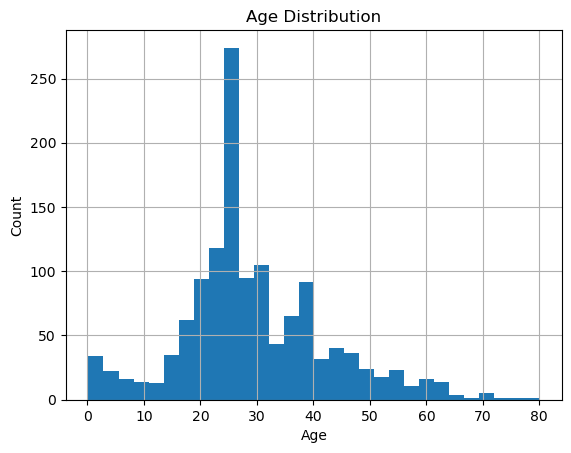

In [25]:
# visual check to see if these values cause the data to skew or normal
import matplotlib.pyplot as plt

df_titanic_copy['age'].hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

* Most passengers were between **20 and 40 years old, with a sharp peak around 30 years.**

* There are some very **young passengers (ages close to 0).**

* The distribution is **right-skewed**, meaning there were fewer older passengers.

* The spike around 30 suggests that a large group of passengers were in that age range.

<hr>

* There are no out of scope values like negative, or extremely high values
* The infant ages seem valid so I've kept them

In [26]:
# describe dataset
df_titanic_copy.describe().round(2)

,pclass,survived,sex,age,fare
count,1309.00,1309.00,1309.00,1309.00,1309.00
mean,2.29,0.38,0.36,29.41,33.28
std,0.84,0.49,0.48,13.14,51.74
min,1.00,0.00,0.00,0.17,0.00
25%,2.00,0.00,0.00,22.00,7.90
50%,3.00,0.00,0.00,26.00,14.45
75%,3.00,1.00,1.00,37.00,31.28
max,3.00,1.00,1.00,80.00,512.33


In [27]:
# final view of the dataframe
pd.set_option('display.max_rows', None)
df_titanic_copy

,pclass,survived,sex,age,fare,embarked
0,1,1,1,29.00,211.340000,S
1,1,1,0,0.92,151.550000,S
2,1,0,1,2.00,151.550000,S
3,1,0,0,30.00,151.550000,S
4,1,0,1,25.00,151.550000,S
5,1,1,0,48.00,26.550000,S
6,1,1,1,63.00,77.960000,S
7,1,0,0,39.00,0.000000,S
8,1,1,1,53.00,51.480000,S
9,1,0,0,71.00,49.500000,C


### 8. Export Cleaned Dataset

In [28]:
df_titanic.to_csv('../data/processed/final_titanic_data.csv', index=False)